In [113]:
import json
from urllib.request import urlopen, Request
import pandas as pd

In [122]:
def read_url(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.3'}
    req_url = Request(url=url, headers=headers)
    json_txt = json.loads(urlopen(req_url).read())
    return json_txt

def get_coin_info(coin_name):
    coin_map = read_url('https://whattomine.com/calculators.json')
    try:
        map_id = coin_map['coins'][coin_name]['id']
        coin_json = read_json_url('https://whattomine.com/coins/' + str(map_id) + '.json')
        return coin_json
    except KeyError:
        print('Select from list of available coins:')
        print(coin_map['coins'].keys())
        return coin_map['coins'].keys()

def get_coin_with_algorithm(algorithm):
    coin_map = read_url('https://whattomine.com/calculators.json')
    algo_list = []
    coin_list = []
    for coin in coin_map['coins'].keys():
        algo = coin_map['coins'][coin]['algorithm']
        algo_list.append(algo)
        if algo == algorithm:
            coin_list.append(coin)
    if not coin_list:
        print('No coins available with selected algorithm.')
        print('Available algorithms are:')
        print(sorted(set(algo_list)))
        return set(algo_list)
    return coin_list
        

In [120]:
df = pd.json_normalize(get_coin_info('Bitcoin'))


In [131]:
df = pd.DataFrame()
for coin in coin_map['coins'].keys():
    try:
        df = pd.concat([df, pd.json_normalize(get_coin_info(coin))])
    except:
        print('skipping', coin,'...')

skipping 365Coin ...
skipping Aced ...
skipping Aiden ...
skipping Adzcoin ...
skipping Ambercoin ...
skipping Amsterdamcoin ...
skipping Anon ...
skipping ARG-Scrypt ...
skipping ARG-SHA ...
skipping Aricoin ...
skipping Azart ...
skipping Bitcoin Interest ...
skipping Belacoin ...
skipping Bipcoin ...
skipping Bismuth ...
skipping Dobbscoin ...
skipping BlockStamp ...
skipping GlobalBoost-Y ...
skipping Bata ...
skipping BitcoinPrivate ...
skipping Bitmark ...
skipping Bitcore ...
skipping Burnercoin ...
skipping Bulwark ...
skipping Cachecoin ...
skipping Cannabiscoin ...
skipping BottleCaps ...
skipping Litecash ...
skipping Catcoin ...
skipping Bullion ...
skipping X-Children ...
skipping Checkcoin ...
skipping Cloakcoin ...
skipping CRowdCLassic ...
skipping Creativecoin ...
skipping CrocodileCash ...
skipping Crown ...
skipping Cryptcoin ...
skipping Crypto ...
skipping Curecoin ...
skipping Decred ...
skipping Dinastycoin ...
skipping Deutsche eMark ...
skipping Dero ...
skippi

In [144]:
get_coin_info('Monero')

{'id': 101,
 'name': 'Monero',
 'tag': 'XMR',
 'algorithm': 'RandomX',
 'block_time': '119.0',
 'block_reward': 0.911317566201,
 'block_reward24': 0.916563102139242,
 'block_reward3': 0.9171761797870848,
 'block_reward7': 0.9209552874018085,
 'last_block': 2424167,
 'difficulty': 319294256740.0,
 'difficulty24': 318141654164.922,
 'difficulty3': 320686656573.5353,
 'difficulty7': 318520252375.7229,
 'nethash': 2683145014,
 'exchange_rate': 0.005791,
 'exchange_rate24': 0.00582912952646239,
 'exchange_rate3': 0.005929617712524504,
 'exchange_rate7': 0.0060471724720343074,
 'exchange_rate_vol': 228.53420368,
 'exchange_rate_curr': 'BTC',
 'market_cap': '$4,686,349,263',
 'pool_fee': '0.000000',
 'estimated_rewards': '0.000349',
 'btc_revenue': '0.00000202',
 'revenue': '$0.09',
 'cost': '$0.65',
 'profit': '-$0.56',
 'status': 'Active',
 'lagging': False,
 'testing': False,
 'listed': True,
 'timestamp': 1628618064}

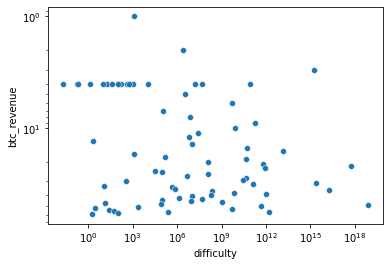

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='difficulty', y='btc_revenue', data=df)
plt.xscale('log')
plt.yscale('log')
plt.show()